In [4]:
%matplotlib inline
%load_ext tensorboard
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime
import math
from IPython.display import Image

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Tensorflow callbacks are functions or blocks of code which are executed during a specific instant while training a Deep Learning Model. Once the training process is started there is no way to pause the training in case we want to change some params. Also, in some cases when the model has been trained for several hours and we want to tweak some parameters at the later stages, it is impossible to do so. This is where TensorFlow callbacks come to the rescue.

In [4]:
mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train),(x_val, y_val) = mnist.load_data()
x_train, x_val = x_train / 255.0, x_val / 255.0


In [5]:
tf.keras.backend.clear_session()

def build_model():
    inp = tf.keras.Input((28,28))
    flattern_layer = tf.keras.layers.Flatten()(inp)
    dense_1 = tf.keras.layers.Dense(512, activation='relu')(flattern_layer)
    output_layer = tf.keras.layers.Dense(10, activation='softmax')(dense_1)
    
    model = tf.keras.Model(inputs=inp, outputs=output_layer)
    
    return model


EarlyStopping

In [7]:
model = build_model()
opt = tf.keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        # "no longer improving" being defined as "no better than 1e-2 less"
        min_delta=1e-2,
        # "no longer improving" being further defined as "for at least 2 epochs"
        patience=2,
        verbose=1,
    )
]
model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=64,
    callbacks=callbacks,
    validation_split=0.2,
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 8s 171us/step - loss: 0.6086 - acc: 0.8075 - val_loss: 0.4245 - val_acc: 0.8479
Epoch 2/20
48000/48000 [==============================] - 7s 153us/step - loss: 0.4193 - acc: 0.8491 - val_loss: 0.4148 - val_acc: 0.8472
Epoch 3/20
48000/48000 [==============================] - 8s 157us/step - loss: 0.3947 - acc: 0.8571 - val_loss: 0.4390 - val_acc: 0.8520
Epoch 00003: early stopping


ModelCheckpoint

In [83]:
tf.keras.backend.clear_session()

model = build_model()
opt = tf.keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        # The saved model name will include the current epoch.
        filepath="checkpoints/mymodel_{epoch}.h5",
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="val_loss",
        verbose=1,
    )
]
history = model.fit(
    x_train, y_train, epochs=5, batch_size=64, callbacks=callbacks, validation_split=0.2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
47424/48000 [============================>.] - ETA: 0s - loss: 0.5625 - acc: 0.8105
Epoch 00001: val_loss improved from inf to 0.47629, saving model to checkpoints/mymodel_1.h5
48000/48000 [==============================] - 5s 96us/sample - loss: 0.5610 - acc: 0.8108 - val_loss: 0.4763 - val_acc: 0.8178
Epoch 2/5
47680/48000 [============================>.] - ETA: 0s - loss: 0.4228 - acc: 0.8482
Epoch 00002: val_loss improved from 0.47629 to 0.40531, saving model to checkpoints/mymodel_2.h5
48000/48000 [==============================] - 5s 98us/sample - loss: 0.4227 - acc: 0.8482 - val_loss: 0.4053 - val_acc: 0.8489
Epoch 3/5
47552/48000 [============================>.] - ETA: 0s - loss: 0.3846 - acc: 0.8606
Epoch 00003: val_loss improved from 0.40531 to 0.37796, saving model to checkpoints/mymodel_3.h5
48000/48000 [==============================] - 5s 102us/sample - loss: 0.3841 - acc: 0.8606 - val_loss: 0.3780 - val_acc: 0.8

In [13]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

## Learning rate scheduler

In [84]:
initial_learning_rate = 0.1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10, decay_rate=0.96, staircase=True
)

print(0.1*0.96 )
        
opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)
model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(
    x_val, y_val, epochs=30, batch_size=64, validation_split=0.2
)

0.096
Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 1s 157us/sample - loss: 11.5362 - acc: 0.6301 - val_loss: 1.0994 - val_acc: 0.7075
Epoch 2/30
8000/8000 [==============================] - 1s 136us/sample - loss: 0.9301 - acc: 0.6901 - val_loss: 0.7668 - val_acc: 0.7350
Epoch 3/30
8000/8000 [==============================] - 1s 156us/sample - loss: 0.7421 - acc: 0.7391 - val_loss: 0.7076 - val_acc: 0.7440
Epoch 4/30
8000/8000 [==============================] - 2s 188us/sample - loss: 0.6051 - acc: 0.7930 - val_loss: 0.6837 - val_acc: 0.7820
Epoch 5/30
8000/8000 [==============================] - 1s 147us/sample - loss: 0.5232 - acc: 0.8154 - val_loss: 0.6112 - val_acc: 0.8160
Epoch 6/30
8000/8000 [==============================] - 1s 153us/sample - loss: 0.4765 - acc: 0.8326 - val_loss: 0.5953 - val_acc: 0.8175
Epoch 7/30
8000/8000 [==============================] - 1s 161us/sample - loss: 0.4506 - acc: 0.8424 - val_loss: 0.62

In [2]:
Image(url='https://miro.medium.com/max/1050/1*7xeRIjAhnih6EWKrOk_aKw.png')

You can pass a list of callbacks (as the keyword argument callbacks) to the following model methods:

keras.Model.fit()
keras.Model.evaluate()
keras.Model.predict()

Custom Learning rate Scheduler

In [85]:
# links
# https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/LearningRateSchedule
# https://towardsdatascience.com/learning-rate-schedules-and-adaptive-learning-rate-methods-for-deep-learning-2c8f433990d1


def step_decay(epoch):
   initial_lrate = 0.1
   drop = 0.5
   epochs_drop = 10.0
   lrate = initial_lrate * math.pow(drop,  
           math.floor((1+epoch)/epochs_drop))
   return lrate


class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
       self.losses = []
       self.lr = []
 
    def on_epoch_end(self, batch, logs={}):
       self.losses.append(logs.get('loss'))
       self.lr.append(step_decay(len(self.losses)))
        
loss_history = LossHistory()
lrate = tf.keras.callbacks.LearningRateScheduler(step_decay)
callbacks_list = [loss_history, lrate]

# opt = tf.keras.optimizers.RMSprop(learning_rate=lr_schedule)
opt = tf.keras.optimizers.RMSprop()
model.compile(optimizer=opt,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(
    x_val, y_val, epochs=30, batch_size=64, callbacks=callbacks_list, validation_split=0.2
)

Train on 8000 samples, validate on 2000 samples
Epoch 1/30
8000/8000 [==============================] - 1s 179us/sample - loss: 4.1203 - acc: 0.6225 - val_loss: 1.8178 - val_acc: 0.5665
Epoch 2/30
8000/8000 [==============================] - 1s 146us/sample - loss: 1.4995 - acc: 0.6062 - val_loss: 1.1510 - val_acc: 0.6075
Epoch 3/30
8000/8000 [==============================] - 1s 175us/sample - loss: 1.5651 - acc: 0.6012 - val_loss: 1.2142 - val_acc: 0.6365
Epoch 4/30
8000/8000 [==============================] - 1s 135us/sample - loss: 1.5893 - acc: 0.6024 - val_loss: 2.9332 - val_acc: 0.5830
Epoch 5/30
8000/8000 [==============================] - 1s 128us/sample - loss: 1.4170 - acc: 0.6173 - val_loss: 1.3212 - val_acc: 0.6590
Epoch 6/30
8000/8000 [==============================] - 1s 134us/sample - loss: 1.3006 - acc: 0.6226 - val_loss: 1.2410 - val_acc: 0.5505
Epoch 7/30
8000/8000 [==============================] - 1s 136us/sample - loss: 1.4077 - acc: 0.6125 - val_loss: 1.1392 - va

dict_keys(['loss', 'acc', 'val_loss', 'val_acc', 'lr'])
[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.025, 0.0125]


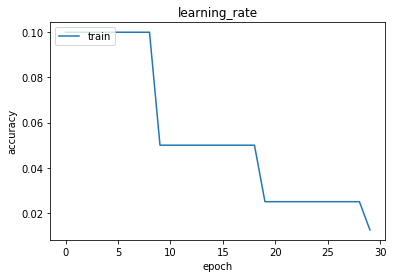

In [86]:
print(history.history.keys())
print(history.history['lr'])
# plt.plot(history.history['learning_ra}te'])
plt.plot(history.history['lr'])
plt.title('learning_rate')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Tensorboard

In [23]:
# link = https://www.tensorflow.org/tensorboard/scalars_and_keras

logdir = "logs\\scalars\\" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        # Path where to save the model
        # The two parameters below mean that we will overwrite
        # the current checkpoint if and only if
        # the `val_loss` score has improved.
        # The saved model name will include the current epoch.
        filepath="checkpoints/mymodel_{epoch}.h5",
        save_best_only=True,  # Only save a model if `val_loss` has improved.
        monitor="val_loss",
        verbose=1,
    ), 
    tensorboard_callback
]
history = model.fit(
    x_train, y_train, epochs=2, batch_size=64, callbacks=callbacks, validation_split=0.2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/2
47744/48000 [============================>.] - ETA: 0s - loss: 0.3868 - acc: 0.8579
Epoch 00001: val_loss improved from inf to 0.41580, saving model to checkpoints/mymodel_1.h5
48000/48000 [==============================] - 7s 156us/sample - loss: 0.3865 - acc: 0.8582 - val_loss: 0.4158 - val_acc: 0.8588
Epoch 2/2
47872/48000 [============================>.] - ETA: 0s - loss: 0.3687 - acc: 0.8668
Epoch 00002: val_loss improved from 0.41580 to 0.40554, saving model to checkpoints/mymodel_2.h5
48000/48000 [==============================] - 8s 158us/sample - loss: 0.3688 - acc: 0.8668 - val_loss: 0.4055 - val_acc: 0.8594


In [27]:
%tensorboard --logdir logs/scalars

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 11220.

Custom callback

In [36]:



# https://www.tensorflow.org/guide/keras/custom_callback

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    print('\nlogs', logs.keys())
    if(logs.get('acc')>0.60):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True
        
callbacks = myCallback()

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, callbacks=[callbacks], validation_data= (x_val, y_val))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
59808/60000 [============================>.] - ETA: 0s - loss: 0.4761 - acc: 0.8293
logs dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
60000/60000 [==============================] - 8s 129us/sample - loss: 0.4754 - acc: 0.8295 - val_loss: 0.4338 - val_acc: 0.8457
Epoch 2/10
59776/60000 [============================>.] - ETA: 0s - loss: 0.3581 - acc: 0.8688
logs dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
60000/60000 [==============================] - 8s 141us/sample - loss: 0.3582 - acc: 0.8688 - val_loss: 0.3559 - val_acc: 0.8737
Epoch 3/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.3218 - acc: 0.8819
logs dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])
60000/60000 [==============================] - 9s 146us/sample - loss: 0.3219 - acc: 0.8819 - val_loss: 0.3672 - val_acc: 0.8698
Epoch 4/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.2983 - acc: 0.8893- E
logs dict_keys(